In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('datasource/application_train.csv')

In [3]:
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
test = pd.read_csv('datasource/application_test.csv')

In [5]:
test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [6]:
# preprocessing, drop some outlier manualy, outliers increase to ca.500 observations if dropping more than 8
train['CNT_CHILDREN'].replace(19, np.nan, inplace=True)
train['CNT_CHILDREN'].replace(14, np.nan, inplace=True)
train['CNT_CHILDREN'].replace(12, np.nan, inplace=True)
train['CNT_CHILDREN'].replace(11, np.nan, inplace=True)
train['CNT_CHILDREN'].replace(10, np.nan, inplace=True)
train['CNT_CHILDREN'].replace(9, np.nan, inplace=True)
train['CNT_CHILDREN'].replace(8, np.nan, inplace=True)

test['CNT_CHILDREN'].replace(20, np.nan, inplace=True)
test['CNT_CHILDREN'].replace(11, np.nan, inplace=True)

In [7]:
# Note: XNA does not exist in test['CODE_GENDER']
train['CODE_GENDER'].replace('XNA', np.nan, inplace=True)

In [8]:
# Binary encoding for nominal variables with 2 labels only, both train and test
for col in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    train[col], uniques = pd.factorize(train[col])
    test[col], uniques = pd.factorize(test[col])

In [9]:
train.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans            0             0   
1      100003       0         Cash loans            1             0   
2      100004       0    Revolving loans            0             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0           0.0          202500.0    406597.5      24700.5   
1                1           0.0          270000.0   1293502.5      35698.5   
2                0           0.0           67500.0    135000.0       6750.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  

[3 rows x 122 columns]

In [10]:
# Fill in missing values before OneHot Encoding nominal features
train['OCCUPATION_TYPE'] = train['OCCUPATION_TYPE'].fillna("Laborers")
test['OCCUPATION_TYPE'] = test['OCCUPATION_TYPE'].fillna("Laborers")
train['NAME_TYPE_SUITE'] = train['NAME_TYPE_SUITE'].fillna("Unaccompanied")
test['NAME_TYPE_SUITE'] = test['NAME_TYPE_SUITE'].fillna("Unaccompanied")

In [11]:
# One-Hot Encoding for other nominal variables
def one_hot_encode(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix = column, drop_first=True)
    df = pd.concat ([df, dummies], axis=1)
    return df
for column in ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                                 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']:
    train = one_hot_encode(train, column)
    test = one_hot_encode(test, column)

In [12]:
# Drop original nominal columns after One-Hot Encoding, DO NOT FORGET TO CHECK MULTI-COLLINEARITY of these columns later on
dropped_columns = ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                                 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']
train = train.drop(dropped_columns, axis=1)
test = test.drop(dropped_columns, axis=1)

In [13]:
# TO-DOs:
# Align 2 data sets to check whether and how many columns train has more than test, due to the effect of One-Hot Encoding
# Using function missing_values to check which Dummy Columns has 100% missing values
# => Results: train has 3 columns (Dummy Columns) more than test including TARGET, need to delete 2 columns in train => add these two to train (after dropped) in later processing
encoded_train = train
encoded_test = test
final_train, final_test = encoded_train.align(encoded_test, join='left', axis=1)

In [14]:
### Feature Engineering through Data transformation both in train and test
columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS']
for col in columns:
    train[col + '_log'] = [np.log(x) for x in train[col]]
    test[col + '_log'] = [np.log(x) for x in test[col]]
train.head(3)

SK_ID_CURR  TARGET  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002       1            0             0                0   
1      100003       0            1             0                1   
2      100004       0            0             1                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0          202500.0    406597.5      24700.5         351000.0   
1           0.0          270000.0   1293502.5      35698.5        1129500.0   
2           0.0           67500.0    135000.0       6750.0         135000.0   

   ...  ORGANIZATION_TYPE_Transport: type 2  \
0  ...                                    0   
1  ...                                    0   
2  ...                                    0   

   ORGANIZATION_TYPE_Transport: type 3  ORGANIZATION_TYPE_Transport: type 4  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   

   ORGANIZATION_TYPE_University  ORGANIZATION_TYPE_XNA  AMT_INCOME_TOTAL_log  \
0                             0                      0             12.218495   
1                             0                      0             12.506177   
2                             0                      0             11.119883   

   AMT_CREDIT_log  AMT_ANNUITY_log  AMT_GOODS_PRICE_log  CNT_FAM_MEMBERS_log  
0       12.915579        10.114579            12.768542             0.000000  
1       14.072864        10.482864            13.937286             0.693147  
2       11.813030         8.817298            11.813030             0.000000  

[3 rows x 221 columns]

In [15]:
# Feature Engineering through Data transformation both in train and test
from sklearn.preprocessing import minmax_scale
train['DAYS_REGISTRATION_scaled'] = minmax_scale(train['DAYS_REGISTRATION'])
test['DAYS_REGISTRATION_scaled'] = minmax_scale(test['DAYS_REGISTRATION'])
train.head(3)

SK_ID_CURR  TARGET  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002       1            0             0                0   
1      100003       0            1             0                1   
2      100004       0            0             1                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0          202500.0    406597.5      24700.5         351000.0   
1           0.0          270000.0   1293502.5      35698.5        1129500.0   
2           0.0           67500.0    135000.0       6750.0         135000.0   

   ...  ORGANIZATION_TYPE_Transport: type 3  \
0  ...                                    0   
1  ...                                    0   
2  ...                                    0   

   ORGANIZATION_TYPE_Transport: type 4  ORGANIZATION_TYPE_University  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             0   

   ORGANIZATION_TYPE_XNA  AMT_INCOME_TOTAL_log  AMT_CREDIT_log  \
0                      0             12.218495       12.915579   
1                      0             12.506177       14.072864   
2                      0             11.119883       11.813030   

   AMT_ANNUITY_log  AMT_GOODS_PRICE_log  CNT_FAM_MEMBERS_log  \
0        10.114579            12.768542             0.000000   
1        10.482864            13.937286             0.693147   
2         8.817298            11.813030             0.000000   

   DAYS_REGISTRATION_scaled  
0                  0.852140  
1                  0.951929  
2                  0.827335  

[3 rows x 222 columns]

# Quick Visualization

In [16]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from pylab import rcParams

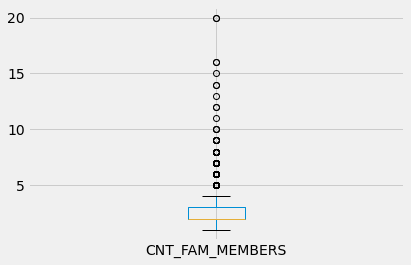

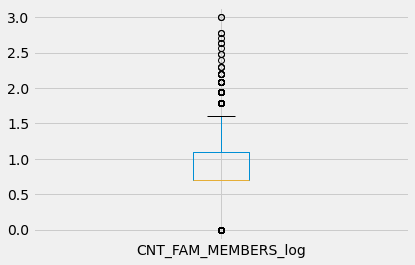

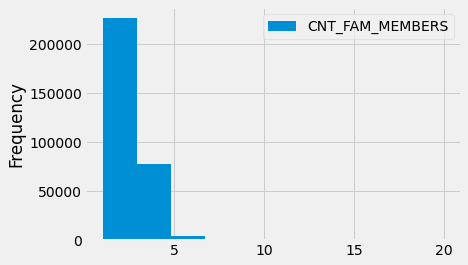

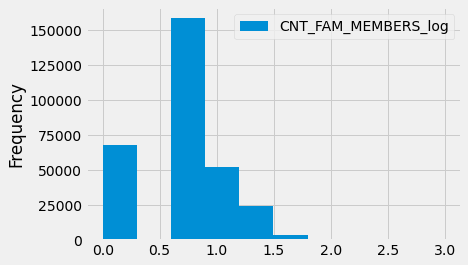

In [17]:
plt.style.use('fivethirtyeight')

rcParams['figure.figsize'] = 6, 4

train[['CNT_FAM_MEMBERS']].plot(kind='box') # Before Scaling
train[['CNT_FAM_MEMBERS_log']].plot(kind='box') # After Scaling
train[['CNT_FAM_MEMBERS']].plot(kind='hist') # Before Scaling
train[['CNT_FAM_MEMBERS_log']].plot(kind='hist') # After Scaling

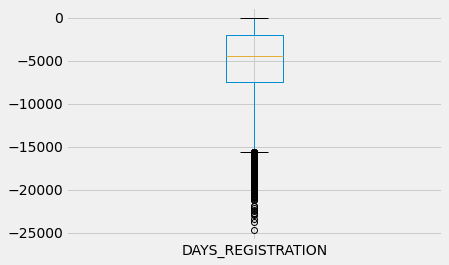

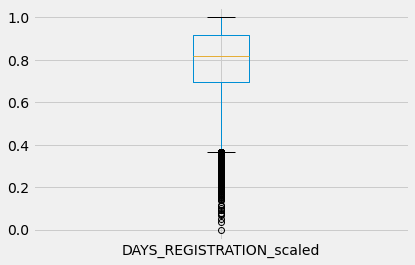

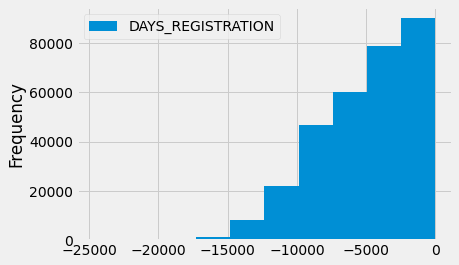

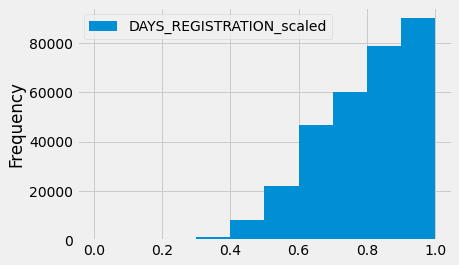

In [18]:
train[['DAYS_REGISTRATION']].plot(kind='box')
train[['DAYS_REGISTRATION_scaled']].plot(kind='box')
train[['DAYS_REGISTRATION']].plot(kind='hist')
train[['DAYS_REGISTRATION_scaled']].plot(kind='hist')

In [19]:
# Preprocess EXT_SOURCE before feature engineering
train['EXT_SOURCE_1'] = train['EXT_SOURCE_1'].fillna(0)
train['EXT_SOURCE_2'] = train['EXT_SOURCE_2'].fillna(0)
train['EXT_SOURCE_3'] = train['EXT_SOURCE_3'].fillna(0)
train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].head(3)

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
0      0.083037      0.262949      0.139376
1      0.311267      0.622246      0.000000
2      0.000000      0.555912      0.729567

In [20]:
# Add new features to both train and test
train['DEBT_RATIO'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']
train['PAYMENT_TO_INCOME_RATIO'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']
train['PAYMENT_TO_DEBT_RATIO'] = train['AMT_ANNUITY'] / train['AMT_CREDIT']
train['DEBT_TO_PAYMENT_RATIO'] = train['AMT_CREDIT'] / train['AMT_ANNUITY']
train['DEBT_TO_PURCHASE_RATIO'] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train['EXT_SOURCE_SUM'] = train['EXT_SOURCE_1'] + train['EXT_SOURCE_2'] + train['EXT_SOURCE_3']
train['EXT_SOURCE_MEAN'] = train[['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)

test['DEBT_RATIO'] = test['AMT_CREDIT'] / test['AMT_INCOME_TOTAL']
test['PAYMENT_TO_INCOME_RATIO'] = test['AMT_ANNUITY'] / test['AMT_INCOME_TOTAL']
test['PAYMENT_TO_DEBT_RATIO'] = test['AMT_ANNUITY'] / test['AMT_CREDIT']
test['DEBT_TO_PAYMENT_RATIO'] = test['AMT_CREDIT'] / test['AMT_ANNUITY']
test['DEBT_TO_PURCHASE_RATIO'] = test['AMT_CREDIT'] / test['AMT_GOODS_PRICE']
test['EXT_SOURCE_SUM'] = test['EXT_SOURCE_1'] + test['EXT_SOURCE_2'] + test['EXT_SOURCE_3']
test['EXT_SOURCE_MEAN'] = test[['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)

In [21]:
# Drop missing (>= 55%), insignificant columns including 2 Dummy columns that do not exist in test
train_dropped = train.drop(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
                            'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 
                            'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 
                            'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'OWN_CAR_AGE', 
                            'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'LANDAREA_AVG', 
                            'LANDAREA_MODE', 'LANDAREA_MEDI', 'BASEMENTAREA_AVG','BASEMENTAREA_MODE', 
                            'BASEMENTAREA_MEDI', 'WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
                           'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE_Maternity leave','NAME_FAMILY_STATUS_Unknown'], axis=1)
train_dropped.shape

(307511, 200)

In [22]:
test_dropped = test.drop(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 
                            'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 
                            'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 
                            'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'OWN_CAR_AGE', 
                            'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'LANDAREA_AVG', 
                            'LANDAREA_MODE', 'LANDAREA_MEDI', 'BASEMENTAREA_AVG','BASEMENTAREA_MODE', 
                            'BASEMENTAREA_MEDI', 'WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 
                         'WEEKDAY_APPR_PROCESS_START'], axis=1)
test_dropped.shape

(48744, 199)

In [23]:
# Free up memory
import copy
import gc

del train, test
gc.collect()

15842

In [24]:
train = train_dropped.fillna((train_dropped.median()))
train.isnull().sum()

SK_ID_CURR                0
TARGET                    0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
                         ..
PAYMENT_TO_DEBT_RATIO     0
DEBT_TO_PAYMENT_RATIO     0
DEBT_TO_PURCHASE_RATIO    0
EXT_SOURCE_SUM            0
EXT_SOURCE_MEAN           0
Length: 200, dtype: int64

In [25]:
test = test_dropped.fillna((test_dropped.median()))
test.isnull().sum()

SK_ID_CURR                0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
                         ..
PAYMENT_TO_DEBT_RATIO     0
DEBT_TO_PAYMENT_RATIO     0
DEBT_TO_PURCHASE_RATIO    0
EXT_SOURCE_SUM            0
EXT_SOURCE_MEAN           0
Length: 199, dtype: int64

# Save final data

In [30]:
train_dropped.to_csv('datasource/train.csv', index=None)

In [31]:
test_dropped.to_csv('datasource/test.csv', index=None)